# <center>RETO - SEMANA 1</center>
## <center>CIENCIA Y ANALITICA DE DATOS</center>
## <center>EQUIPO 12</center>
### <center>Guillermo Alfonso Muñiz Hermosillo - A01793101</center>
### <center>José Ramiro Adán Charles - A00174646</center>

In [311]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

from tqdm import tqdm
import geopandas as gpd
from shapely.geometry import Point
import qeds
qeds.themes.mpl_style();
from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
dfSubterraneas = pd.read_csv('aguasSubterraneas.csv', encoding='latin-1')

print('Shape de Datos de Aguas Subterraneas', dfSubterraneas.shape)


Shape de Datos de Aguas Subterraneas (1068, 57)


In [3]:
dfSubterraneas.head(2)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


## LIMPIEZA DE BASE DE DATOS DE AGUAS SUBTERRANEAS

**De acuerdo a un analisis visual de las bases de datos, decidimos establecer las siguientes clasificaciones a las columnas para poder llevar a cabo la limpieza de datos en ambas BD.**

In [4]:
categoricasSubte = ['ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','SEMAFORO','CONTAMINANTES', 'CUMPLE_CON_ALC', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_DUR', 'CUMPLE_CON_NO3']
numericasSubte = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
points = ['LONGITUD', 'LATITUD']
NASubte = ['CLAVE','SITIO','PERIODO','SDT_mg/L']
binariasSubte = ['CUMPLE_CON_FLUO','CUMPLE_CON_CF','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

**Procederemos pues a un analisis de cada juego de columnas, mostrando datos vacios o inconsistentes y decidiendo que hacer para cada caso**

### Variables Categoricas

Como variables categoricas definimos aquellas variables las cuales se pueden dividir en grupos de acuerdo a sus valores. Para dichas variables en caso de valores faltantes, se recomienda utilizar el valor que mas veces aparece (moda). 

In [5]:
dfSubterraneas[categoricasSubte].shape

(1068, 28)

In [6]:
dfSubterraneas[categoricasSubte].dtypes

ORGANISMO_DE_CUENCA     object
ESTADO                  object
MUNICIPIO               object
ACUIFERO                object
SUBTIPO                 object
CALIDAD_ALC             object
CALIDAD_CONDUC          object
CALIDAD_SDT_ra          object
CALIDAD_SDT_salin       object
CALIDAD_FLUO            object
CALIDAD_DUR             object
CALIDAD_COLI_FEC        object
CALIDAD_N_NO3           object
CALIDAD_AS              object
CALIDAD_CD              object
CALIDAD_CR              object
CALIDAD_HG              object
CALIDAD_PB              object
CALIDAD_MN              object
CALIDAD_FE              object
SEMAFORO                object
CONTAMINANTES           object
CUMPLE_CON_ALC          object
CUMPLE_CON_SDT_ra       object
CUMPLE_CON_COND         object
CUMPLE_CON_SDT_salin    object
CUMPLE_CON_DUR          object
CUMPLE_CON_NO3          object
dtype: object

Como vemos este subconjunto conjunto de datos cuenta con 1068 filas y 28 columnas y Todos son de tipo Object (Strings)

Verifiquemos cuantos valores estan vacios en cada columna

In [7]:
dfSubterraneas[categoricasSubte].isna().sum()

ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
CALIDAD_ALC               4
CALIDAD_CONDUC            6
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
CALIDAD_FLUO              0
CALIDAD_DUR               1
CALIDAD_COLI_FEC          0
CALIDAD_N_NO3             1
CALIDAD_AS                0
CALIDAD_CD                0
CALIDAD_CR                0
CALIDAD_HG                0
CALIDAD_PB                0
CALIDAD_MN                0
CALIDAD_FE                0
SEMAFORO                  0
CONTAMINANTES           434
CUMPLE_CON_ALC            0
CUMPLE_CON_SDT_ra         0
CUMPLE_CON_COND           0
CUMPLE_CON_SDT_salin      0
CUMPLE_CON_DUR            0
CUMPLE_CON_NO3            0
dtype: int64

Al ser estas variables clategoricas, utilizaremos la media como medio imputacion, lo haremos a traves de un pipeline al final de este analisis.

In [8]:
dfSubterraneas[['CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_DUR', 'CALIDAD_N_NO3', 'CUMPLE_CON_ALC', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_DUR', 'CUMPLE_CON_NO3']].mode()

,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_DUR,CALIDAD_N_NO3,CUMPLE_CON_ALC,CUMPLE_CON_SDT_ra,CUMPLE_CON_COND,CUMPLE_CON_SDT_salin,CUMPLE_CON_DUR,CUMPLE_CON_NO3
0,Alta,Permisible para riego,Excelente para riego,Potable - Dulce,Potable - Dura,Potable - Excelente,SI,SI,SI,SI,SI,SI


Podemos identificar un caso especial. En la columna de CONTAMINANTES, los registros que no tienen valor son aquellos que cumplen con las espectativas de contaminacion (SI o ND). Por lo que son una categoria propia, la cual tenemos que crear nosotros ya que no entra en la misma categoria de que el mas frecuente es el que debemos de utilizar como valor de remplazo.

In [9]:
dfSubterraneas['CONTAMINANTES'] = dfSubterraneas['CONTAMINANTES'].fillna('CLEAN')
dfSubterraneas[categoricasSubte].isna().sum()

ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
CALIDAD_ALC             4
CALIDAD_CONDUC          6
CALIDAD_SDT_ra          2
CALIDAD_SDT_salin       2
CALIDAD_FLUO            0
CALIDAD_DUR             1
CALIDAD_COLI_FEC        0
CALIDAD_N_NO3           1
CALIDAD_AS              0
CALIDAD_CD              0
CALIDAD_CR              0
CALIDAD_HG              0
CALIDAD_PB              0
CALIDAD_MN              0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_DUR          0
CUMPLE_CON_NO3          0
dtype: int64

Aplicaremos nuestro rellenado de valores nulos con un Imputador Simple con la estraqtegia de mas reciente

In [42]:
simpleImput = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x = simpleImput.fit_transform(dfSubterraneas[categoricasSubte])
dfSubterraneas[categoricasSubte] = x
dfSubterraneas[categoricasSubte].isna().sum()

ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
CALIDAD_ALC             0
CALIDAD_CONDUC          0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
CALIDAD_FLUO            0
CALIDAD_DUR             0
CALIDAD_COLI_FEC        0
CALIDAD_N_NO3           0
CALIDAD_AS              0
CALIDAD_CD              0
CALIDAD_CR              0
CALIDAD_HG              0
CALIDAD_PB              0
CALIDAD_MN              0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_DUR          0
CUMPLE_CON_NO3          0
dtype: int64

Utilizaremos un Pipeline para nuestras variables categoricas, utilizando la estrategia de One hot encoding

In [61]:
pipeline_categoricas = Pipeline(steps=[
    ('onehot_cat', OneHotEncoder(drop='first', handle_unknown='ignore'))
]);

### Variables Numericas

Como variables numericas definimos aquellas variables las cuales sus valores son cuantificables. Para dichas variables en caso de valores faltantes, se recomienda utilizar el valor promedio (media). 

In [11]:
dfSubterraneas[numericasSubte].shape

(1068, 14)

In [12]:
dfSubterraneas[numericasSubte].dtypes

ALC_mg/L               float64
CONDUCT_mS/cm          float64
SDT_M_mg/L              object
FLUORUROS_mg/L          object
DUR_mg/L                object
COLI_FEC_NMP/100_mL     object
N_NO3_mg/L              object
AS_TOT_mg/L             object
CD_TOT_mg/L             object
CR_TOT_mg/L             object
HG_TOT_mg/L             object
PB_TOT_mg/L             object
MN_TOT_mg/L             object
FE_TOT_mg/L             object
dtype: object

Como vemos este subconjunto conjunto de datos cuenta con 1068 filas y 14 columnas. Sin embargo solo 2 son de tipo numerico y las restantes de tipo Object (Strings) Por lo cual tenemos que convertir dichas cadenas a valores numericos.

Verifiquemos los valores NA antes de aplicar alguna modificacion

In [13]:
dfSubterraneas[numericasSubte].isna().sum()

ALC_mg/L               4
CONDUCT_mS/cm          6
SDT_M_mg/L             2
FLUORUROS_mg/L         0
DUR_mg/L               1
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             1
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

Ahora, usando el meto extact de pandas extraeremos los numeros contenidos en las columnas y despues convertiremos los valores a flotantes con el metodo is_numeric de pandas el cual a los valores que no puedan ser convertidos les asignara el valor de NaN

In [14]:
numericasToConv = ['SDT_M_mg/L', 'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
for col in dfSubterraneas[numericasToConv].columns:
    dfSubterraneas[col] = dfSubterraneas[str(col)].str.extract(r'([0-9].*)')
    dfSubterraneas[col] = pd.to_numeric(dfSubterraneas[col], errors='coerce')

Verificamos de nuevo el tipo de dato sea flotante y los valores faltantes son los mismos por lo que ya no existen cadenas en nuestra base de datos.

In [15]:
dfSubterraneas[numericasSubte].dtypes

ALC_mg/L               float64
CONDUCT_mS/cm          float64
SDT_M_mg/L             float64
FLUORUROS_mg/L         float64
DUR_mg/L               float64
COLI_FEC_NMP/100_mL    float64
N_NO3_mg/L             float64
AS_TOT_mg/L            float64
CD_TOT_mg/L            float64
CR_TOT_mg/L            float64
HG_TOT_mg/L            float64
PB_TOT_mg/L            float64
MN_TOT_mg/L            float64
FE_TOT_mg/L            float64
dtype: object

In [16]:
dfSubterraneas[numericasSubte].isna().sum()

ALC_mg/L               4
CONDUCT_mS/cm          6
SDT_M_mg/L             2
FLUORUROS_mg/L         0
DUR_mg/L               1
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             1
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

Al ser estas variables numericas, podemos utilizar la media o la mediana como medio imputacion, dependiendo de la escala de las variables.

In [17]:
dfSubterraneas[numericasSubte].describe()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1064.000000,1062.000000,1066.000000,1068.000000,1067.000000,1068.000000,1067.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,235.633759,1138.953013,896.101567,1.075600,347.938073,355.490356,4.319759,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387
std,116.874291,1245.563674,2751.530590,1.924278,359.669452,2052.457014,8.345134,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974
min,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
25%,164.000000,501.750000,337.500000,0.267175,121.194800,1.100000,0.650294,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
50%,215.527500,815.000000,550.400000,0.503500,245.335800,1.100000,2.080932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960
75%,292.710000,1322.750000,916.100000,1.139850,453.930000,13.250000,5.201698,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380
max,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


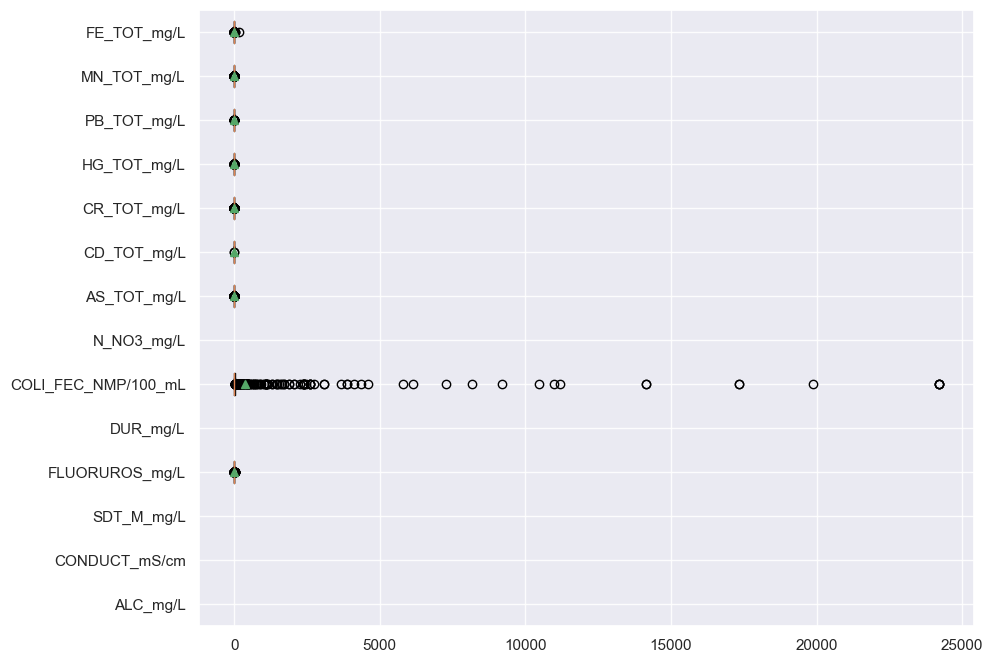

In [18]:
sns.set(rc={'figure.figsize':(10,8)})

plt.boxplot(dfSubterraneas[numericasSubte], labels=dfSubterraneas[numericasSubte].columns, showmeans=True, vert=False)
plt.show()


Como podemos observar ls escalas de cantidades de contaminantes son muy grandes por lo que necesitaremos escalar nuestros datos.

- Un llenado por Mediana, con el fin de obtener el numero mas usado y no el promedio que podria generar un sesgo por la escala de los datos.
- Un escalamiento de datos simple.

In [45]:
simpleImputnum = SimpleImputer(missing_values=np.nan, strategy='median')
xnum = simpleImputnum.fit_transform(dfSubterraneas[numericasSubte])
dfSubterraneas[numericasSubte] = xnum
dfSubterraneas[numericasSubte].isna().sum()

ALC_mg/L               0
CONDUCT_mS/cm          0
SDT_M_mg/L             0
FLUORUROS_mg/L         0
DUR_mg/L               0
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [48]:
scal = StandardScaler()
xscale = scal.fit_transform(dfSubterraneas[numericasSubte])
dfSubterraneas[numericasSubte] = xscale

dfSubterraneas[numericasSubte].describe()


,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1.068000e+03,1.068000e+03,1.068000e+03,1068.000000,1068.000000,1.068000e+03,1.068000e+03,1.068000e+03,1.068000e+03,1068.000000,1.068000e+03,1068.000000,1068.000000,1068.000000
mean,-6.653022e-18,-6.653022e-18,-3.326511e-18,0.000000,0.000000,-6.653022e-18,-1.330604e-17,-1.995907e-17,-3.326511e-18,0.000000,6.653022e-18,0.000000,0.000000,0.000000
std,1.000468e+00,1.000468e+00,1.000468e+00,1.000468,1.000468,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468,1.000468e+00,1.000468,1.000468,1.000468
min,-1.791648e+00,-8.751899e-01,-3.167933e-01,-0.455241,-0.912329,-1.727473e-01,-5.154557e-01,-2.732937e-01,-3.321869e-02,-0.053626,-1.229119e-01,-0.086562,-0.188603,-0.069623
25%,-6.132547e-01,-5.086795e-01,-2.029892e-01,-0.420315,-0.630500,-1.727473e-01,-4.397826e-01,-2.732937e-01,-3.321869e-02,-0.053626,-1.229119e-01,-0.086562,-0.188603,-0.069623
50%,-1.717820e-01,-2.594267e-01,-1.255791e-01,-0.297445,-0.285257,-1.727473e-01,-2.682704e-01,-2.732937e-01,-3.321869e-02,-0.053626,-1.229119e-01,-0.086562,-0.188603,-0.065655
75%,4.876668e-01,1.482768e-01,7.441054e-03,0.033405,0.295225,-1.668248e-01,1.058320e-01,-2.732937e-01,-3.321869e-02,-0.053626,-1.229119e-01,-0.086562,-0.166156,-0.042817
max,1.213000e+01,1.404503e+01,2.957908e+01,17.535665,9.636529,1.162104e+01,1.399566e+01,1.229175e+01,3.253543e+01,32.335133,2.911243e+01,23.246836,23.674371,32.193743


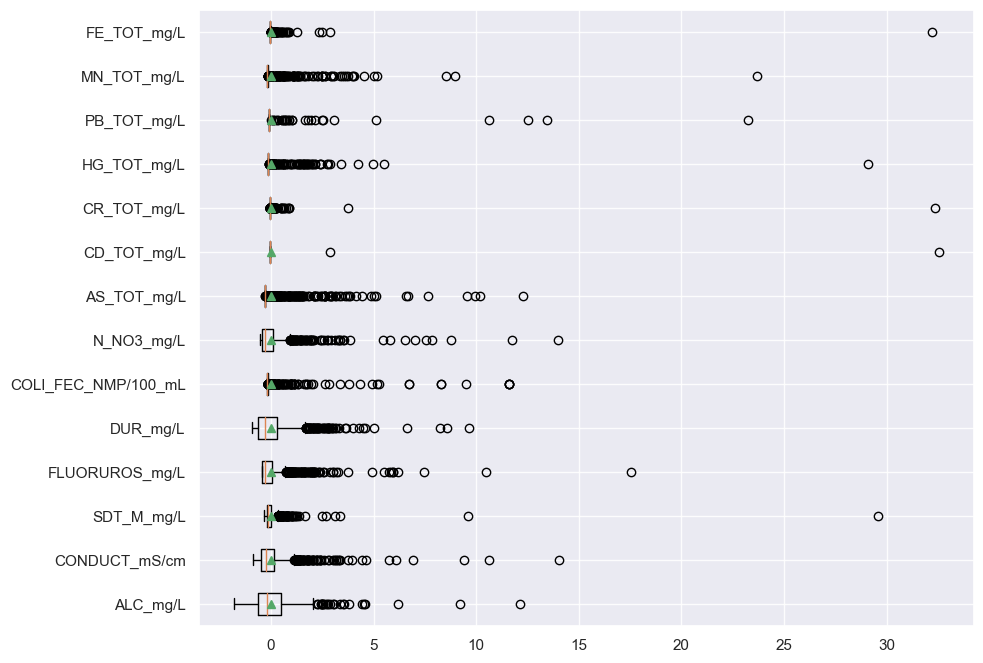

In [49]:
sns.set(rc={'figure.figsize':(10,8)})

plt.boxplot(dfSubterraneas[numericasSubte], labels=dfSubterraneas[numericasSubte].columns, showmeans=True, vert=False)
plt.show()

Ahora podemos observar la distribucion de los datos. La escala de todas estas variables es ahora mas normalizada sin perder la desviacion estandar.

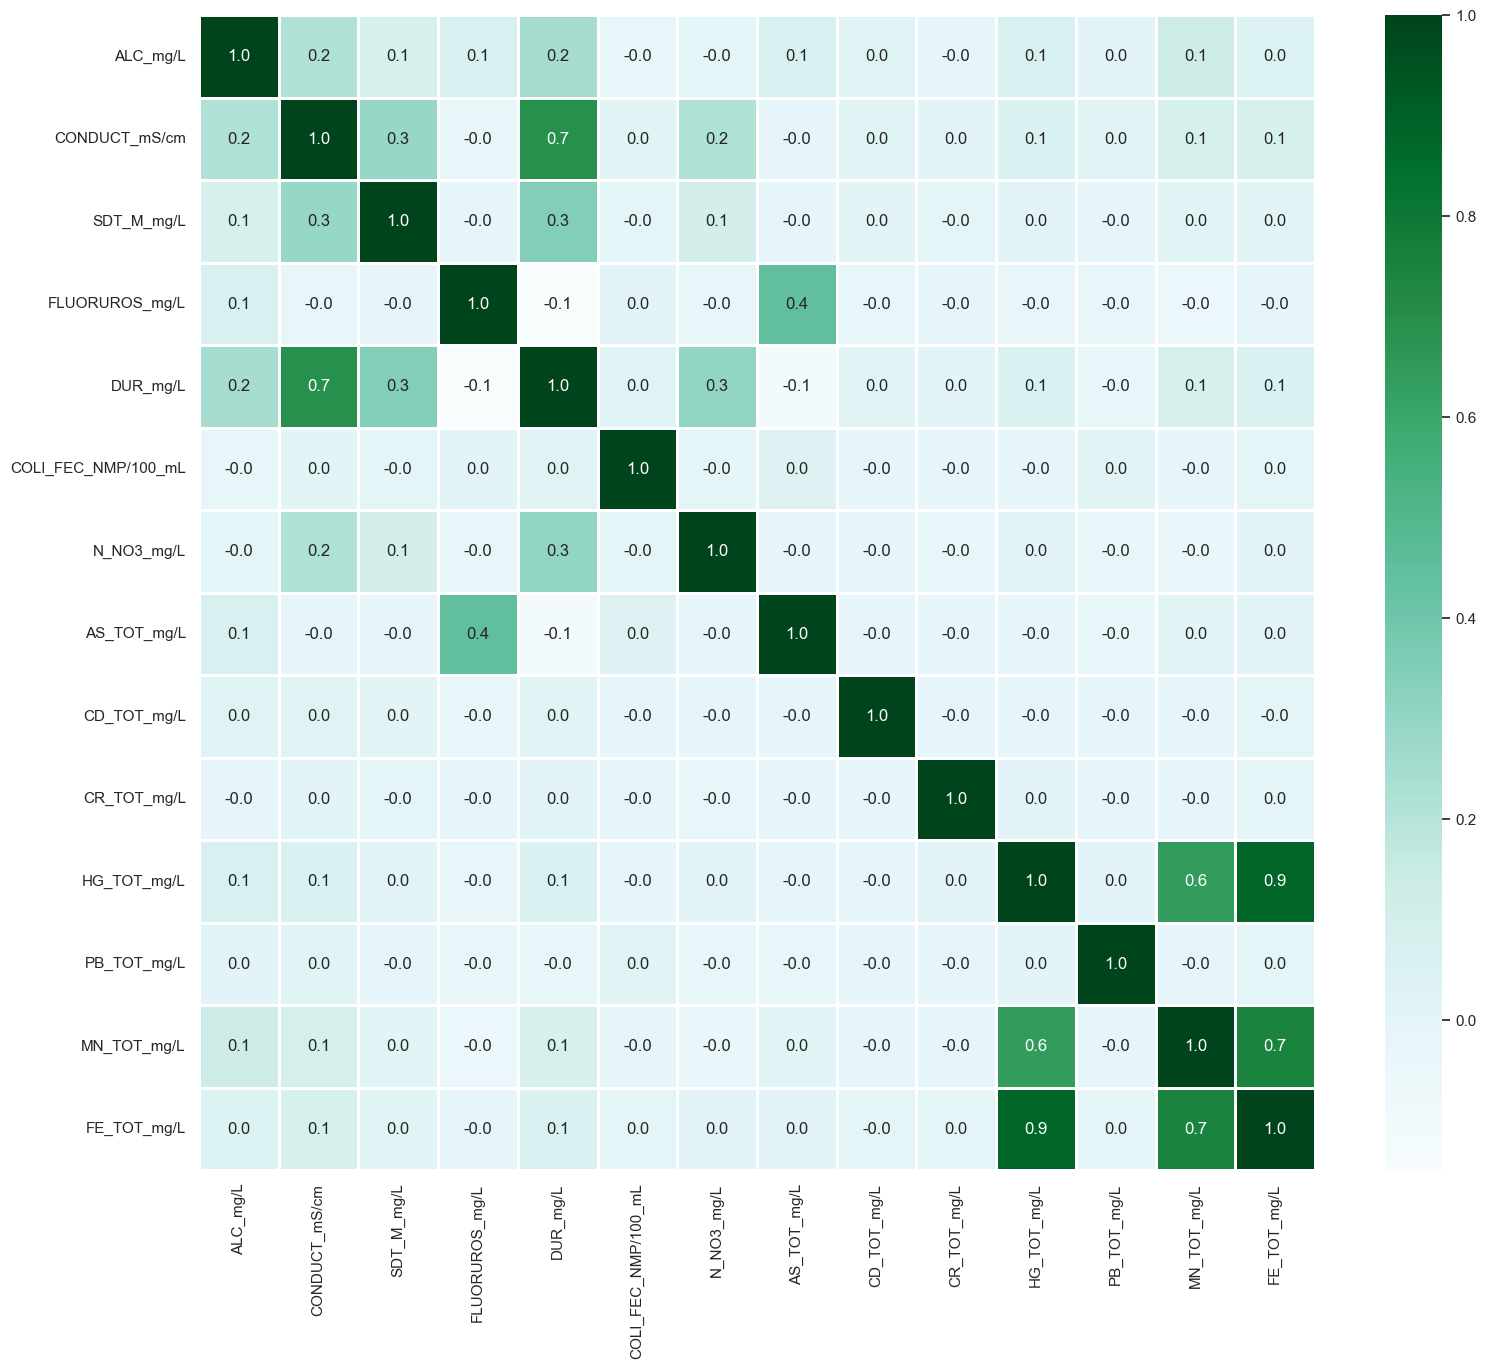

In [68]:
plt.figure(figsize=(18,15)) 
sns.heatmap(dfSubterraneas[numericasSubte].corr(), annot=True, cmap='BuGn', linewidths = 2, fmt=".1f")
plt.show()

### Variables Binarias

Como variables binarias definimos aquellas que solo tienen 2 valores, Verdadero o Falso.

In [20]:
dfSubterraneas[binariasSubte].shape

(1068, 9)

In [21]:
dfSubterraneas[binariasSubte].dtypes

CUMPLE_CON_FLUO    object
CUMPLE_CON_CF      object
CUMPLE_CON_AS      object
CUMPLE_CON_CD      object
CUMPLE_CON_CR      object
CUMPLE_CON_HG      object
CUMPLE_CON_PB      object
CUMPLE_CON_MN      object
CUMPLE_CON_FE      object
dtype: object

Como vemos este subconjunto conjunto de datos cuenta con 1068 filas y 9 columnas. Todas son de tipo Object (strings) esto quiere decir que los valores deben de ser cadenas con valor Si/No
Verifiquemos los valores NA antes de aplicar alguna modificacion

In [22]:
dfSubterraneas[binariasSubte].isna().sum()

CUMPLE_CON_FLUO    0
CUMPLE_CON_CF      0
CUMPLE_CON_AS      0
CUMPLE_CON_CD      0
CUMPLE_CON_CR      0
CUMPLE_CON_HG      0
CUMPLE_CON_PB      0
CUMPLE_CON_MN      0
CUMPLE_CON_FE      0
dtype: int64

Observamos que no existen valores faltantes en estas columnas. Por lo que no sera necesario realizar ninguna inputacion.

Sin embargo, trabajar con valores binarios usando cadenas no es recomendable. Por lo que se utilizara en un pipeline una codificacion para dichos valores.

In [57]:
onehot = OneHotEncoder(drop='if_binary', handle_unknown='ignore')
xonebin = onehot.fit_transform(dfSubterraneas[binariasSubte]).toarray()
dfSubterraneas[binariasSubte] = xonebin
dfSubterraneas[binariasSubte].head()

,CUMPLE_CON_FLUO,CUMPLE_CON_CF,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## VARIABLES DE UBICACION

Definimos asi a las variables en nuestro conjunto de datos que representan una ubicacion en el mapa.

In [24]:
dfSubterraneas[points].shape

(1068, 2)

In [25]:
dfSubterraneas[points].dtypes

LONGITUD    float64
LATITUD     float64
dtype: object

Como vemos este subconjunto conjunto de datos cuenta con 1068 filas y 2 columnas. Algo de esperar ya que en el mapa solo mostramos medidas de Longitud y Latitud
Verifiquemos los valores NA antes de aplicar alguna modificacion

In [26]:
dfSubterraneas[points].isna().sum()

LONGITUD    0
LATITUD     0
dtype: int64

## VARIABLES NO RELEVANTES

Definimos asi a las variables que consideramos no tendran un impacto o cuyos valores son vacios en todos los registros. 
Estas columnas seran eliminadas

In [27]:
# Verificando la forma de nuestro con junto de datos antes de eliminar
dfSubterraneas.shape

(1068, 57)

In [28]:
dfSubterraneas.drop(dfSubterraneas[NASubte], axis=1, inplace=True)
dfSubterraneas.shape

(1068, 53)

Ahora nuestro conjunto de datos solo tiene las columnas relevantes para su estudio.

## PIPELINE

En los siguientes pasos, aplicaremos nuestro pipeline a nuestro conjunto de datos. En el realizaremos las sustituciones y escalamientos que hemos definido en los pasos anteriores

In [69]:
column_transformer = ColumnTransformer(
    transformers=[
        ('categoricas', pipeline_categoricas, categoricasSubte),
    ],
    remainder='passthrough'
)


# Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

Primero asignamos todas las coordinadas a un data frame para ver como se ven los puntos esparcidos en un scatterPlot

In [70]:
latlong=dfSubterraneas[points]
latlong.head()

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138


<AxesSubplot: xlabel='LONGITUD', ylabel='LATITUD'>

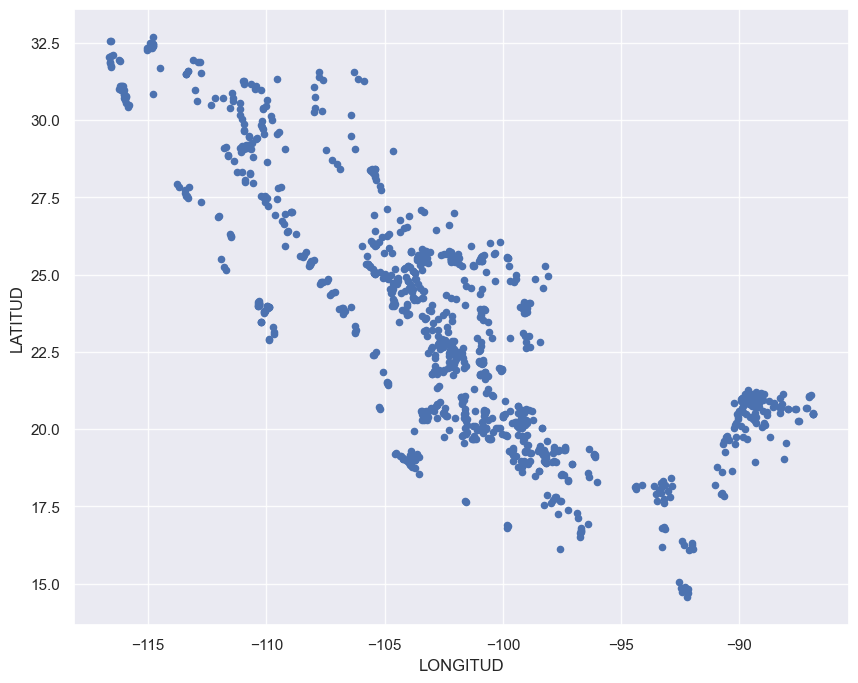

In [71]:
latlong.plot.scatter( "LONGITUD","LATITUD")

Usando Geopandas, descargamos un mapa y filtramos por Mexico para. 

A su vez, creamos un nuevo Dataframe con las aguas contaminadas.
Aquellas que tienen contaminantes y otro dataframe con los que no tienen contaminantes.

In [79]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.loc[world['name'] == 'Mexico']

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
MEX,127575529.0,North America,Mexico,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."


In [94]:
dfNoContaminados = dfSubterraneas.loc[dfSubterraneas['CONTAMINANTES'] == 'CLEAN', ][['LONGITUD', 'LATITUD', 'CONTAMINANTES']]
dfNoContaminados["Coordinates"] = list(zip(dfNoContaminados.LONGITUD, dfNoContaminados.LATITUD))
dfNoContaminados["Coordinates"] = dfNoContaminados["Coordinates"].apply(Point)
gdfNoCont = gpd.GeoDataFrame(dfNoContaminados, geometry="Coordinates")
gdfNoCont.head()

,LONGITUD,LATITUD,CONTAMINANTES,Coordinates
0,-102.022100,22.208870,CLEAN,POINT (-102.02210 22.20887)
1,-102.200750,21.999580,CLEAN,POINT (-102.20075 21.99958)
3,-102.294490,22.184350,CLEAN,POINT (-102.29449 22.18435)
6,-110.213960,23.474600,CLEAN,POINT (-110.21396 23.47460)
8,-110.088778,23.799861,CLEAN,POINT (-110.08878 23.79986)


In [90]:
dfContaminados = dfSubterraneas.loc[dfSubterraneas['CONTAMINANTES'] != 'CLEAN', ][['LONGITUD', 'LATITUD', 'CONTAMINANTES']]
dfContaminados['Coordinates'] = list(zip(dfContaminados.LONGITUD, dfContaminados.LATITUD))
dfContaminados["Coordinates"] = dfContaminados["Coordinates"].apply(Point)
gdfConta = gpd.GeoDataFrame(dfContaminados, geometry="Coordinates")
gdfConta.head()

,LONGITUD,LATITUD,CONTAMINANTES,Coordinates
2,-102.288010,22.366850,"FLUO,AS,",POINT (-102.28801 22.36685)
4,-110.244800,23.451380,"NO3,",POINT (-110.24480 23.45138)
5,-110.220670,23.464930,"CF,",POINT (-110.22067 23.46493)
7,-109.907306,22.890500,"CONDUC,NO3,",POINT (-109.90731 22.89050)
9,-110.054722,23.824722,"DT,CF,AS,MN,FE,",POINT (-110.05472 23.82472)


Recopilando ambos Dataframes, los utilizamos para crear un mapa donde se muestre en verde las aguas no reportadas como contaminadas y las que si en rojo a traves de un mapa de Mexico.

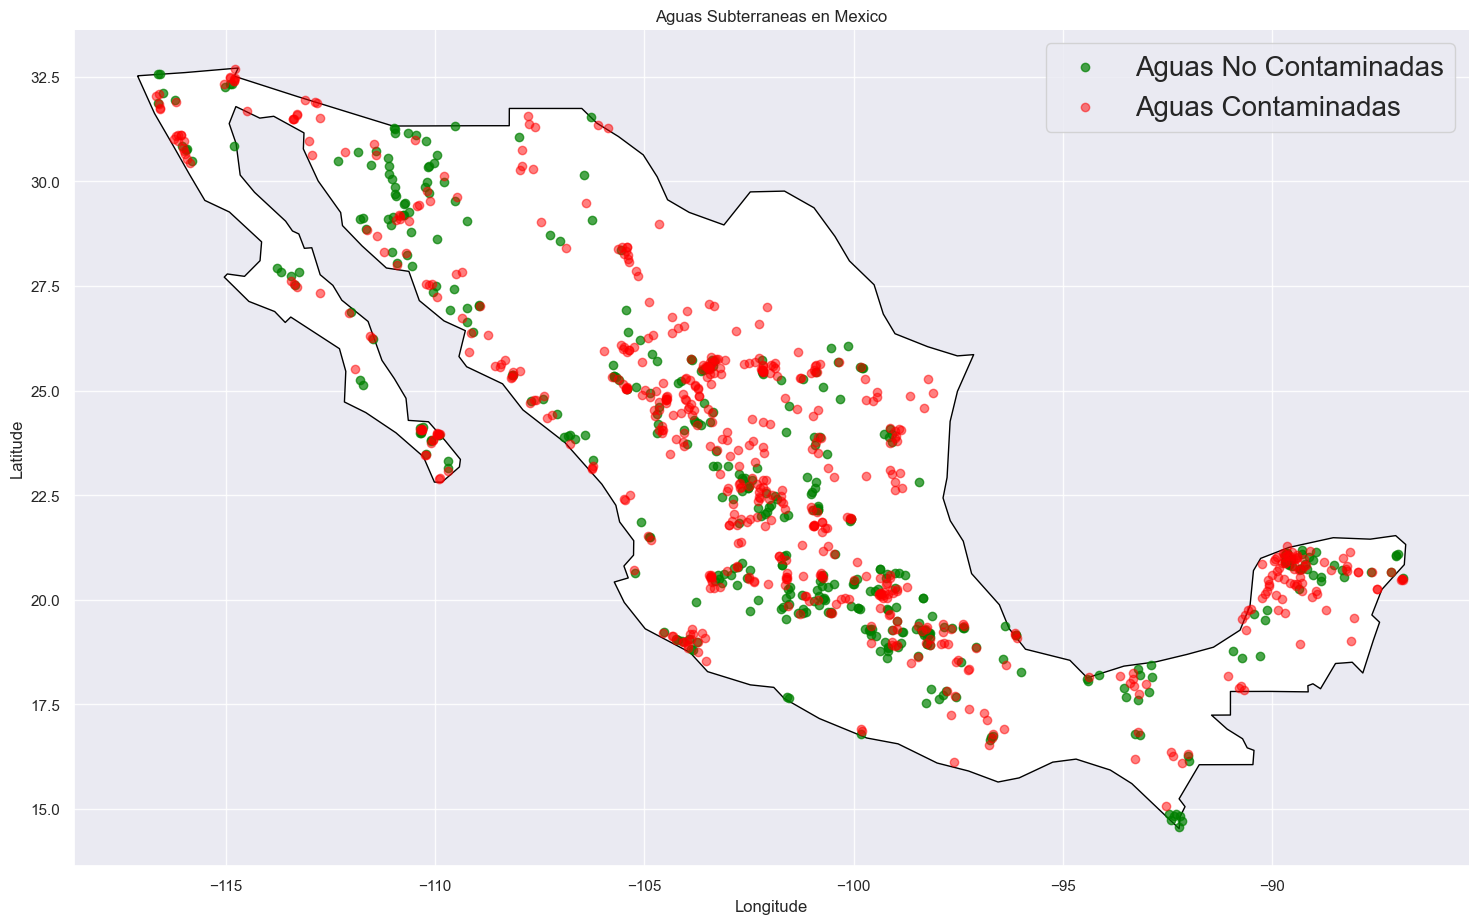

In [123]:
fig, gax = plt.subplots(figsize=(18,12))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdfNoCont.plot(ax=gax, color='green', alpha = 0.7, label='Aguas No Contaminadas')
gdfConta.plot(ax=gax, color='red', alpha=0.5, label='Aguas Contaminadas')

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Aguas Subterraneas en Mexico')


gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend(fontsize=20)
plt.show()

# Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

Generamos nuestras funciones para graficar los centroides y la distribucion de los registros

In [124]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

Definimos las localizaciones un una arreglo de numpy, como se puede observar utilizaremos solamente los registros de aguas contaminadas ya que queremos encontrar si existe alguna relacion entre ellas.

In [208]:
XKmeans = np.array(dfContaminados[['LONGITUD', 'LATITUD']].values.tolist())
XKmeans[0:5]

array([[-102.28801 ,   22.36685 ],
       [-110.2448  ,   23.45138 ],
       [-110.22067 ,   23.46493 ],
       [-109.907306,   22.8905  ],
       [-110.054722,   23.824722]])

## REALIZAMOS K MEANS

Utilizando diferente numero de cluster, graficamos como podrian ser distribuidos y agrupados nuestros registros de aguas contaminadas, mostrando el centro de la distribucion

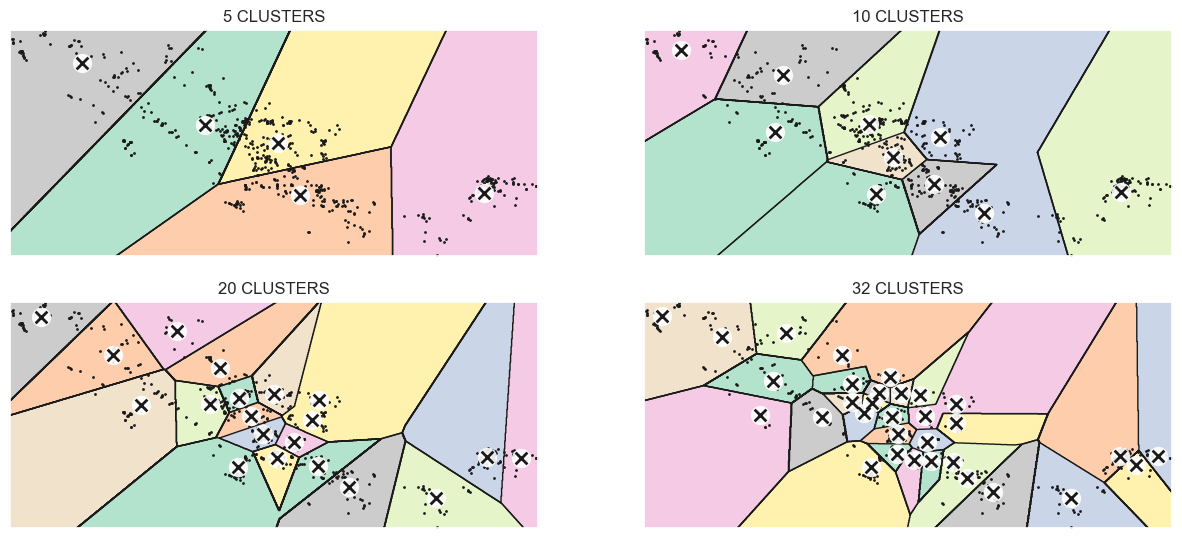

In [209]:
from sklearn.cluster import KMeans

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=10,
                      random_state=42)
kmeans_iter2 = KMeans(n_clusters=10, init="random", n_init=1, max_iter=10,
                      random_state=42)
kmeans_iter3 = KMeans(n_clusters=20, init="random", n_init=1, max_iter=10,
                      random_state=42)
kmeans_iter4 = KMeans(n_clusters=32, init="random", n_init=1, max_iter=10,
                      random_state=42)
kmeans_iter1.fit(XKmeans)
kmeans_iter2.fit(XKmeans)
kmeans_iter3.fit(XKmeans)
kmeans_iter4.fit(XKmeans)

plt.figure(figsize=(15, 10))
plt.subplot(321)
plot_decision_boundaries(kmeans_iter1, XKmeans, show_centroids=False,
                         show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter1.cluster_centers_)
plt.title("5 CLUSTERS")


plt.subplot(322)
plot_decision_boundaries(kmeans_iter2, XKmeans, show_centroids=False,
                         show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.title("10 CLUSTERS")



plt.subplot(323)
plot_decision_boundaries(kmeans_iter3, XKmeans, show_centroids=False, show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.title("20 CLUSTERS")

plt.subplot(324)
plot_decision_boundaries(kmeans_iter4, XKmeans, show_centroids=False, show_ylabels=False,show_xlabels=False)
plot_centroids(kmeans_iter4.cluster_centers_)
plt.title("32 CLUSTERS")

plt.show()

## Encontramos el mejor numero de clusters K

Mediante la realizacion de una grafica de codo, podemos encontrar el mejor numero de clusters.

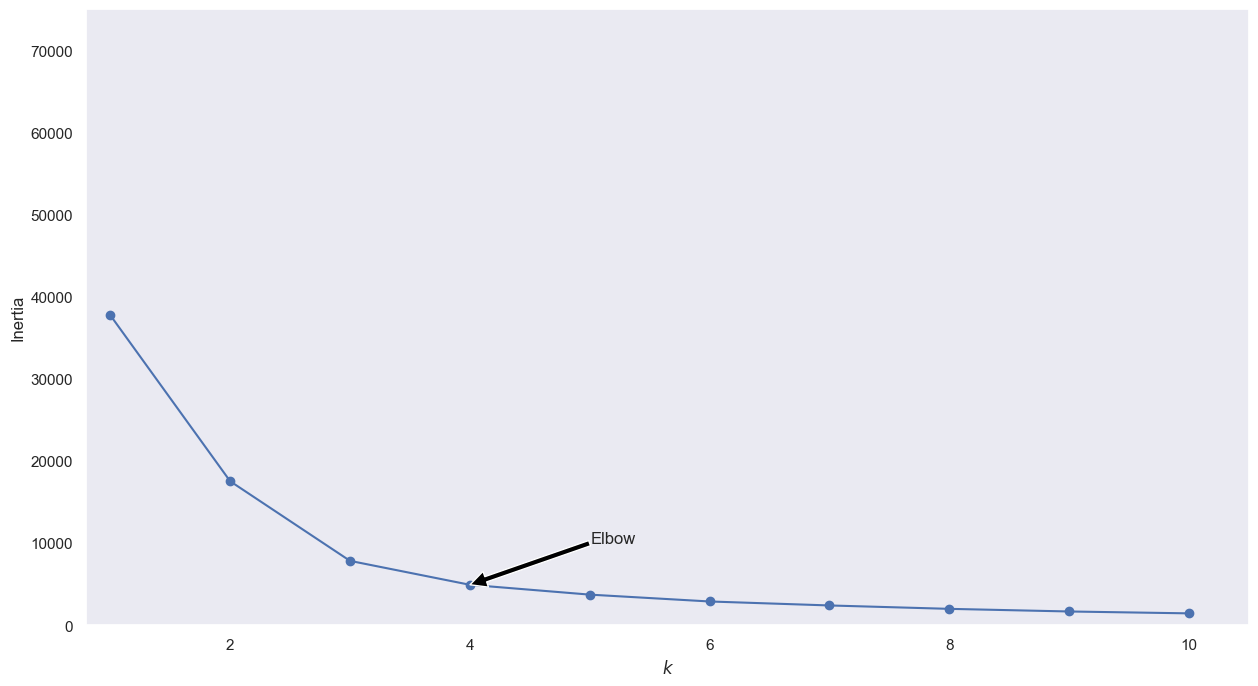

In [220]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(XKmeans)
                for k in range(1, 11, 1)]
inertias = [model.inertia_ for model in kmeans_per_k]
l = [] 
for k in kmeans_per_k:
    l.append(k.n_clusters)
plt.figure(figsize=(15, 8))
plt.plot(l, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(5, 10000),
             arrowprops=dict(facecolor='black', shrink=0.001))
plt.text(5.2, 10000, "Elbow", horizontalalignment="center")
plt.axis([0.8, 10.5, 0, 75000])
plt.grid()
plt.show()

Por lo visto en las anteriores graficas, tomaremos como 4 el numero de clusters. 

Text(0.5, 1.0, '4 CLUSTERS')

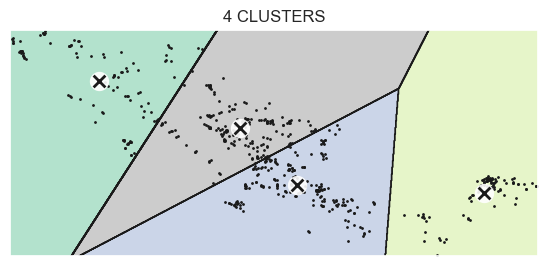

In [246]:
kmeans_final = KMeans(n_clusters=4, init="random", n_init=1, max_iter=10,
                      random_state=42)
kmeans_final.fit(XKmeans)
plt.figure(figsize=(15, 10))
plt.subplot(321)
plot_decision_boundaries(kmeans_final, XKmeans, show_centroids=False,
                         show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_final.cluster_centers_)
plt.title("4 CLUSTERS")

Ahora definiremos la localizacion de los centros de cluster

In [307]:
dfCentroids = pd.DataFrame(kmeans_final.cluster_centers_, columns=['long', 'lat'])
dfCentroids["Coordinates"] = list(zip(dfCentroids.long, dfCentroids.lat))
dfCentroids["Coordinates"] = dfCentroids["Coordinates"].apply(Point)
dfCentroids = gpd.GeoDataFrame(dfCentroids, geometry="Coordinates")

## Agrupando nuestros registros 

In [308]:
columnsKm = np.arange(1, 5, 1)
columnsKm.sort()
distancesKm = pd.DataFrame(kmeans_final.transform(XKmeans).round(2), columns=columnsKm)
distancesKm = pd.DataFrame({'Centro': distancesKm.idxmin(axis=1), 'Distancia': distancesKm.min(axis=1)})
gdfConta.set_index(np.arange(0, len(gdfConta.index), 1), inplace=True)
gdfConta[['Centro', 'Distancia']] = distancesKm[['Centro', 'Distancia']]
gdfConta.sample(10)

,LONGITUD,LATITUD,CONTAMINANTES,Coordinates,Centro,Distancia
339,-102.42800,22.898570,"FE,",POINT (-102.42800 22.89857),4,2.49
365,-102.71887,22.799350,"AS,",POINT (-102.71887 22.79935),4,2.44
11,-111.54894,26.301760,"CONDUC,",POINT (-111.54894 26.30176),1,2.45
375,-99.04580,19.275050,"MN,",POINT (-99.04580 19.27505),2,1.87
108,-103.83367,19.167970,"CF,",POINT (-103.83367 19.16797),2,3.64
44,-90.73954,17.946480,"FLUO,",POINT (-90.73954 17.94648),3,2.15
257,-104.91927,21.523500,"NO3,",POINT (-104.91927 21.52350),4,3.70
244,-102.79253,21.774200,"FLUO,",POINT (-102.79253 21.77420),2,2.66
272,-97.83100,18.954833,"ALC,",POINT (-97.83100 18.95483),2,3.05
291,-100.59898,23.139550,"DT,",POINT (-100.59898 23.13955),2,2.63


In [331]:
geolocator = Nominatim(user_agent="geoapiExercises")

def getMapInfo(Latitude, Longitude):
    location = geolocator.reverse(Latitude+","+Longitude)
 
    address = location.raw['address']
    return address.get('state', '')

In [386]:
lats = dfCentroids.lat
longs = dfCentroids.long
estados = []
for i in range(0, len(lats)):
    print('Ciudad de Localizacion del Centro ' +  str(i) + ': ' + getMapInfo(str(lats[i]), str(longs[i])))
    estados.append(getMapInfo(str(lats[i]), str(longs[i])))



Ciudad de Localizacion del Centro 0: Sonora
Ciudad de Localizacion del Centro 1: Querétaro
Ciudad de Localizacion del Centro 2: Campeche
Ciudad de Localizacion del Centro 3: Durango


Creamos un Dataframe con informacion de las zonas mas pobladas del pais, para ver como se distribuyen en el mapa de acuerdo a los centros y la distribucion de registros

In [341]:
dfZonasMetropolitanas = pd.DataFrame({
    'Nombre': ['Valle de Mexico', 'Monterrey', 'Guadalajara', 'Puebla', 'Toluca', 'Tijuana', 'Merida'],
    'LATITUD': [19.2557, 25.4000, 20.3958, 19.0200, 19.28786, 32.5027, 20.5804  ],
    'LONGITUD': [-99.0759, -100.1800, -103.2107,  -98.1100, -99.65324, -117.00371, -89.3718 ],
    'POBLACION': [21815533, 5341171, 5268642, 3199530, 2353924, 2157853, 1316088],
    })
dfZonasMetropolitanas["Coordinates"] = list(zip(dfZonasMetropolitanas.LONGITUD, dfZonasMetropolitanas.LATITUD))
dfZonasMetropolitanas["Coordinates"] = dfZonasMetropolitanas["Coordinates"].apply(Point)
dfZonasMetropolitanas = gpd.GeoDataFrame(dfZonasMetropolitanas, geometry="Coordinates")
dfZonasMetropolitanas

,Nombre,LATITUD,LONGITUD,POBLACION,Coordinates
0,Valle de Mexico,19.25570,-99.07590,21815533,POINT (-99.07590 19.25570)
1,Monterrey,25.40000,-100.18000,5341171,POINT (-100.18000 25.40000)
2,Guadalajara,20.39580,-103.21070,5268642,POINT (-103.21070 20.39580)
3,Puebla,19.02000,-98.11000,3199530,POINT (-98.11000 19.02000)
4,Toluca,19.28786,-99.65324,2353924,POINT (-99.65324 19.28786)
5,Tijuana,32.50270,-117.00371,2157853,POINT (-117.00371 32.50270)
6,Merida,20.58040,-89.37180,1316088,POINT (-89.37180 20.58040)


Y Finalmente, graficamos nuestros 4 Centroids y sus respectivos registros de agua contaminada.

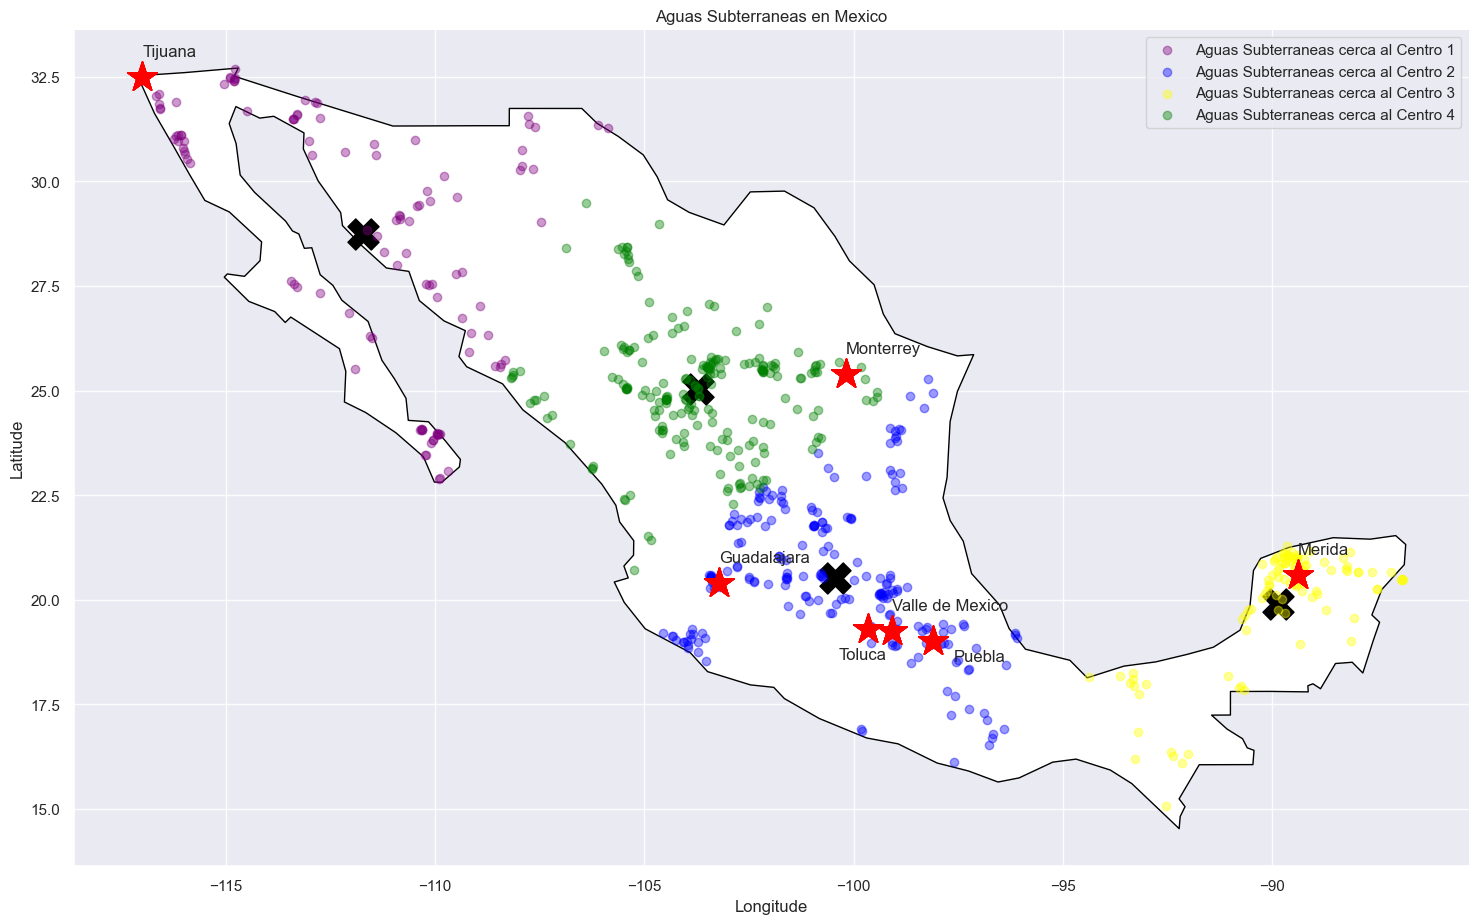

In [384]:
fig, gax = plt.subplots(figsize=(18,12))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

dfCentroids.plot(ax=gax, color='black', marker = "X", markersize = 500)
colors = ['purple', 'blue', 'yellow', 'green']
for idx in range(1,len(distancesKm.Centro.unique()) + 1 ):
    gdfConta.loc[gdfConta['Centro'] == idx].plot(ax=gax, color=colors[idx-1], alpha=0.40, label='Aguas Subterraneas cerca al Centro ' + str(idx) )

for idx, name in enumerate(dfZonasMetropolitanas.Nombre.unique()):
    dfZonasMetropolitanas.plot(ax=gax, color='red', marker = "*", markersize = 500)
    x = dfZonasMetropolitanas.loc[dfZonasMetropolitanas['Nombre'] == name, 'LONGITUD'].values[0]
    y = dfZonasMetropolitanas.loc[dfZonasMetropolitanas['Nombre'] == name, 'LATITUD'].values[0]
    if name == 'Toluca':
        x = x - 0.7
        y = y - 1.2
    if name == 'Puebla':
        x = x + 0.5
        y = y - 1
        
    gax.annotate(name, xy=(x, y), xytext= (x, y+0.5))

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Aguas Subterraneas en Mexico')


gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend()
plt.show()

# Conclusiones Reto -Parte 1:

Como podemos observar se ve una posible relacion entre el numero de personas o ciudades importantes y el numero de aguas subterraneas contaminadas, si bien la relacion usando K-means no es del todo clara, podemos mediante la graficacion de las ciudades importantes ver que hay muchas aguas contaminadas alrededor de ellas, lo que indica actividad humana e industrial en las zonas.

Para este ejercicio aprendimos que es importante la limpieza y transformacion de nuestros datos, ya que de otra manera no pudiera ser posible verificar o encontrar una relacion entre tantos registros y variables. Es necesario considerar las variables que queremos estudiar de acuerdo al problema que seleccionemos, de esta manera podemo llevar acabo una aproximacion adecuada en nuestro analissis de los datos.